# Data histogram

In the thesis, 88 observed binary black hole (BBH) events documented in GWTC-1, GWTC-2, GWTC-2.1, and GWTC-3 were used.  
If an event appeared in multiple catalogs, the most recent version was used.  

Two types of histograms were drawn: one in the source frame and one in the detector frame.  
The relation between the source-frame and detector-frame primary masses is given by:  
$m_1^{detector}=(1+z)m_1^{source}$    
where z is the redshift.   
When drawing the histograms, basic statistical properties such as the mode, median, and mean were also calculated and printed within the code.  

/var/folders/ch/_k4qgk4x52d72hs7lwplg_lw0000gn/T/ipykernel_62942/3073331459.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  GWTC_BBH = pd.read_csv('/Users/isumi/Desktop/[이수미 학위논문]/code file/file/GWTC_BBH.txt',
/var/folders/ch/_k4qgk4x52d72hs7lwplg_lw0000gn/T/ipykernel_62942/3073331459.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontsize=16)
/var/folders/ch/_k4qgk4x52d72hs7lwplg_lw0000gn/T/ipykernel_62942/3073331459.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontsize=16)


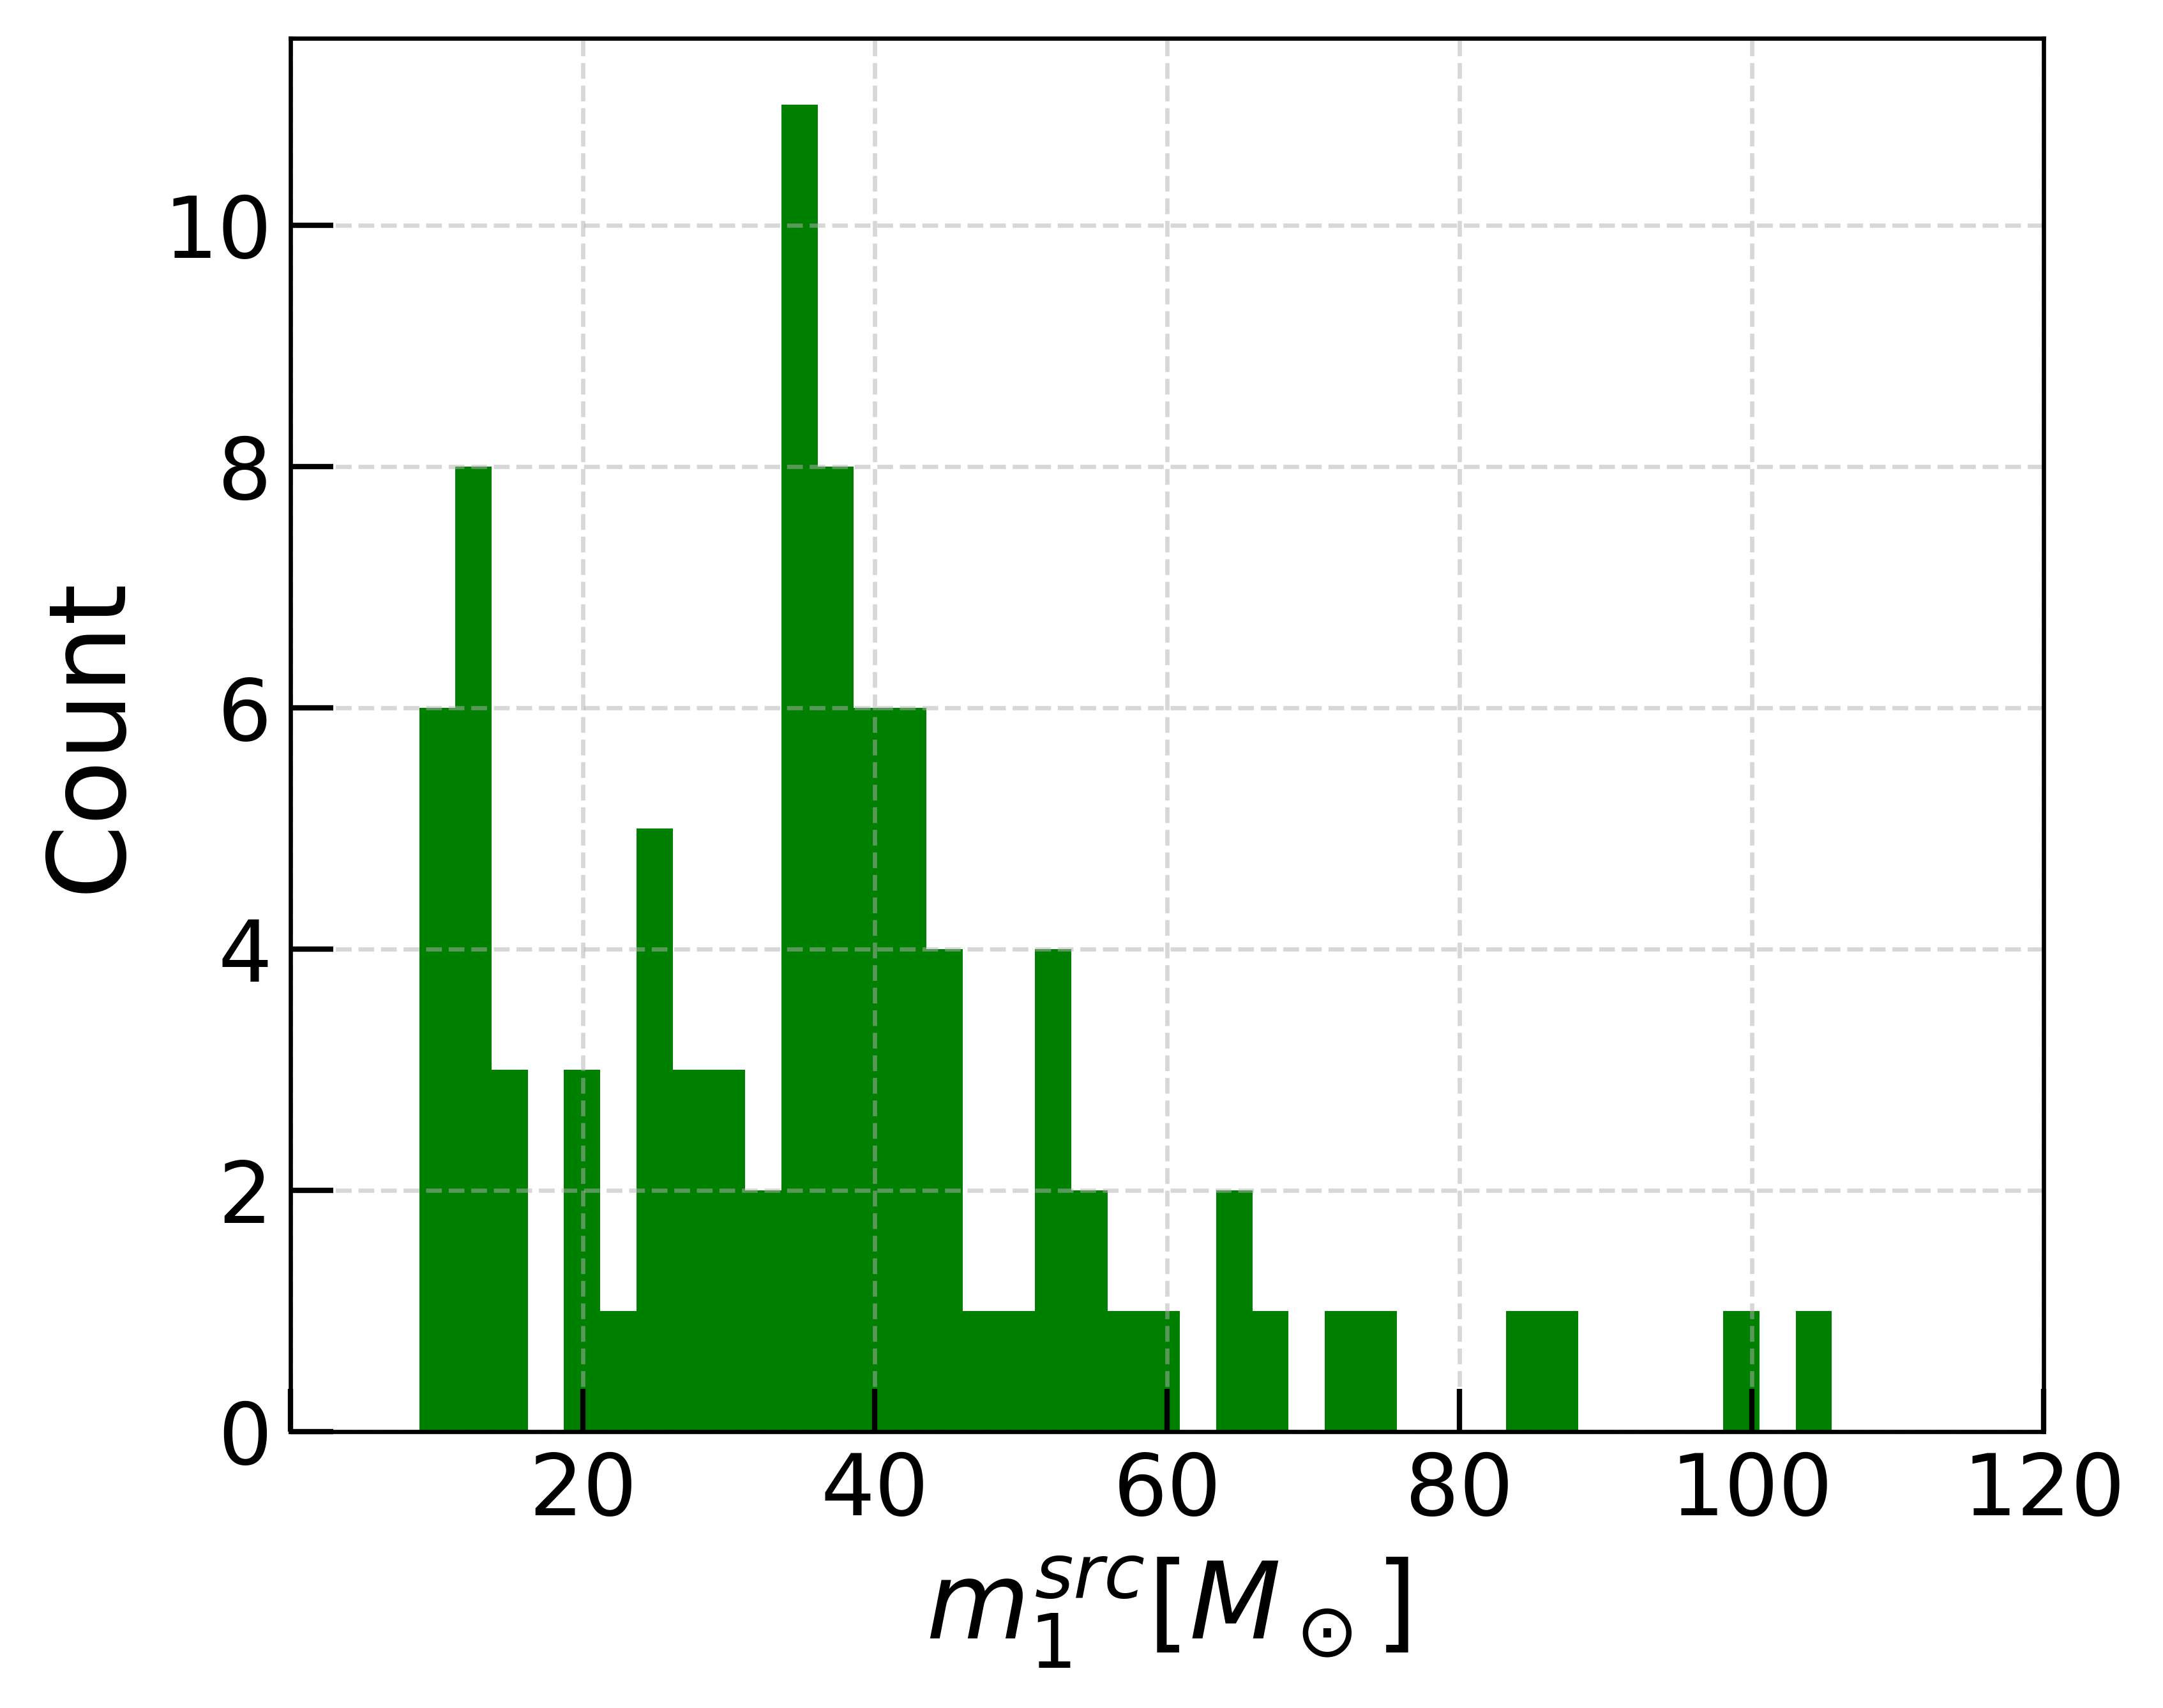

Delta m : 2.4794871794871796
하위 90%의 질량 상한값: 61.5
PDF sum : 218.194872
데이터 갯수 : 88
모드 구간들 :
33.59487179487179-36.07435897435897, value : 11


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

GWTC_BBH = pd.read_csv('/Users/isumi/Desktop/[이수미 학위논문]/code file/file/GWTC_BBH.txt',
                       delim_whitespace=True, encoding='utf-8', na_values="NaN")
m1 = GWTC_BBH['m1_median'].round(1)

m_min,m_max=8.8,105.5
bins=np.linspace(m_min,m_max,40)
plt.figure(figsize=(15/2.54,12/2.54),dpi=600)
hist_values,bin_edges=np.histogram(m1,bins=bins,density=False)
plt.hist(m1,bins=bins,density=False,color='green')
plt.xlim(0,120)
plt.grid(True,linestyle='--',alpha=0.5)
ax=plt.gca()
xticks=ax.get_xticks()
yticks=ax.get_yticks()
common=set(np.round(xticks,6))&set(np.round(yticks,6))
xticklabels = ["" if np.round(t, 6) in common else str(int(t)) for t in xticks]
yticklabels = [f"{t:.0f}" for t in yticks]  # y축은 포맷 유지
ax.set_xticklabels(xticklabels, fontsize=16)
ax.set_yticklabels(yticklabels, fontsize=16)
plt.tick_params(which='major', length=8, width=1, direction='in')
plt.xlabel(r"$m_1^{src} [M_\odot]$",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

# 하위 90%
print("Delta m :",bins[1]-bins[0])
threshold_90=np.quantile(m1,0.9)
print(f"하위 90%의 질량 상한값: {threshold_90:.1f}")
# PDF 총합 계산
pdf_integral=np.sum(hist_values*np.diff(bin_edges))
print(f"PDF sum : {pdf_integral:.6f}")
print(f"데이터 갯수 : {len(m1)}")
# Mode 
max_values=np.max(hist_values)
max_indices=np.where(hist_values==max_values)[0]
mode_ranges=[(bin_edges[i],bin_edges[i+1]) for i in max_indices]
print("모드 구간들 :")
for mode_range in mode_ranges:
    print(f"{mode_range[0]}-{mode_range[1]}, value : {max_values}")

/var/folders/ch/_k4qgk4x52d72hs7lwplg_lw0000gn/T/ipykernel_62942/3077749861.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  GWTC_BBH = pd.read_csv('/Users/isumi/Desktop/[이수미 학위논문]/code file/file/GWTC_BBH.txt',
/var/folders/ch/_k4qgk4x52d72hs7lwplg_lw0000gn/T/ipykernel_62942/3077749861.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontsize=16)
/var/folders/ch/_k4qgk4x52d72hs7lwplg_lw0000gn/T/ipykernel_62942/3077749861.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontsize=16)


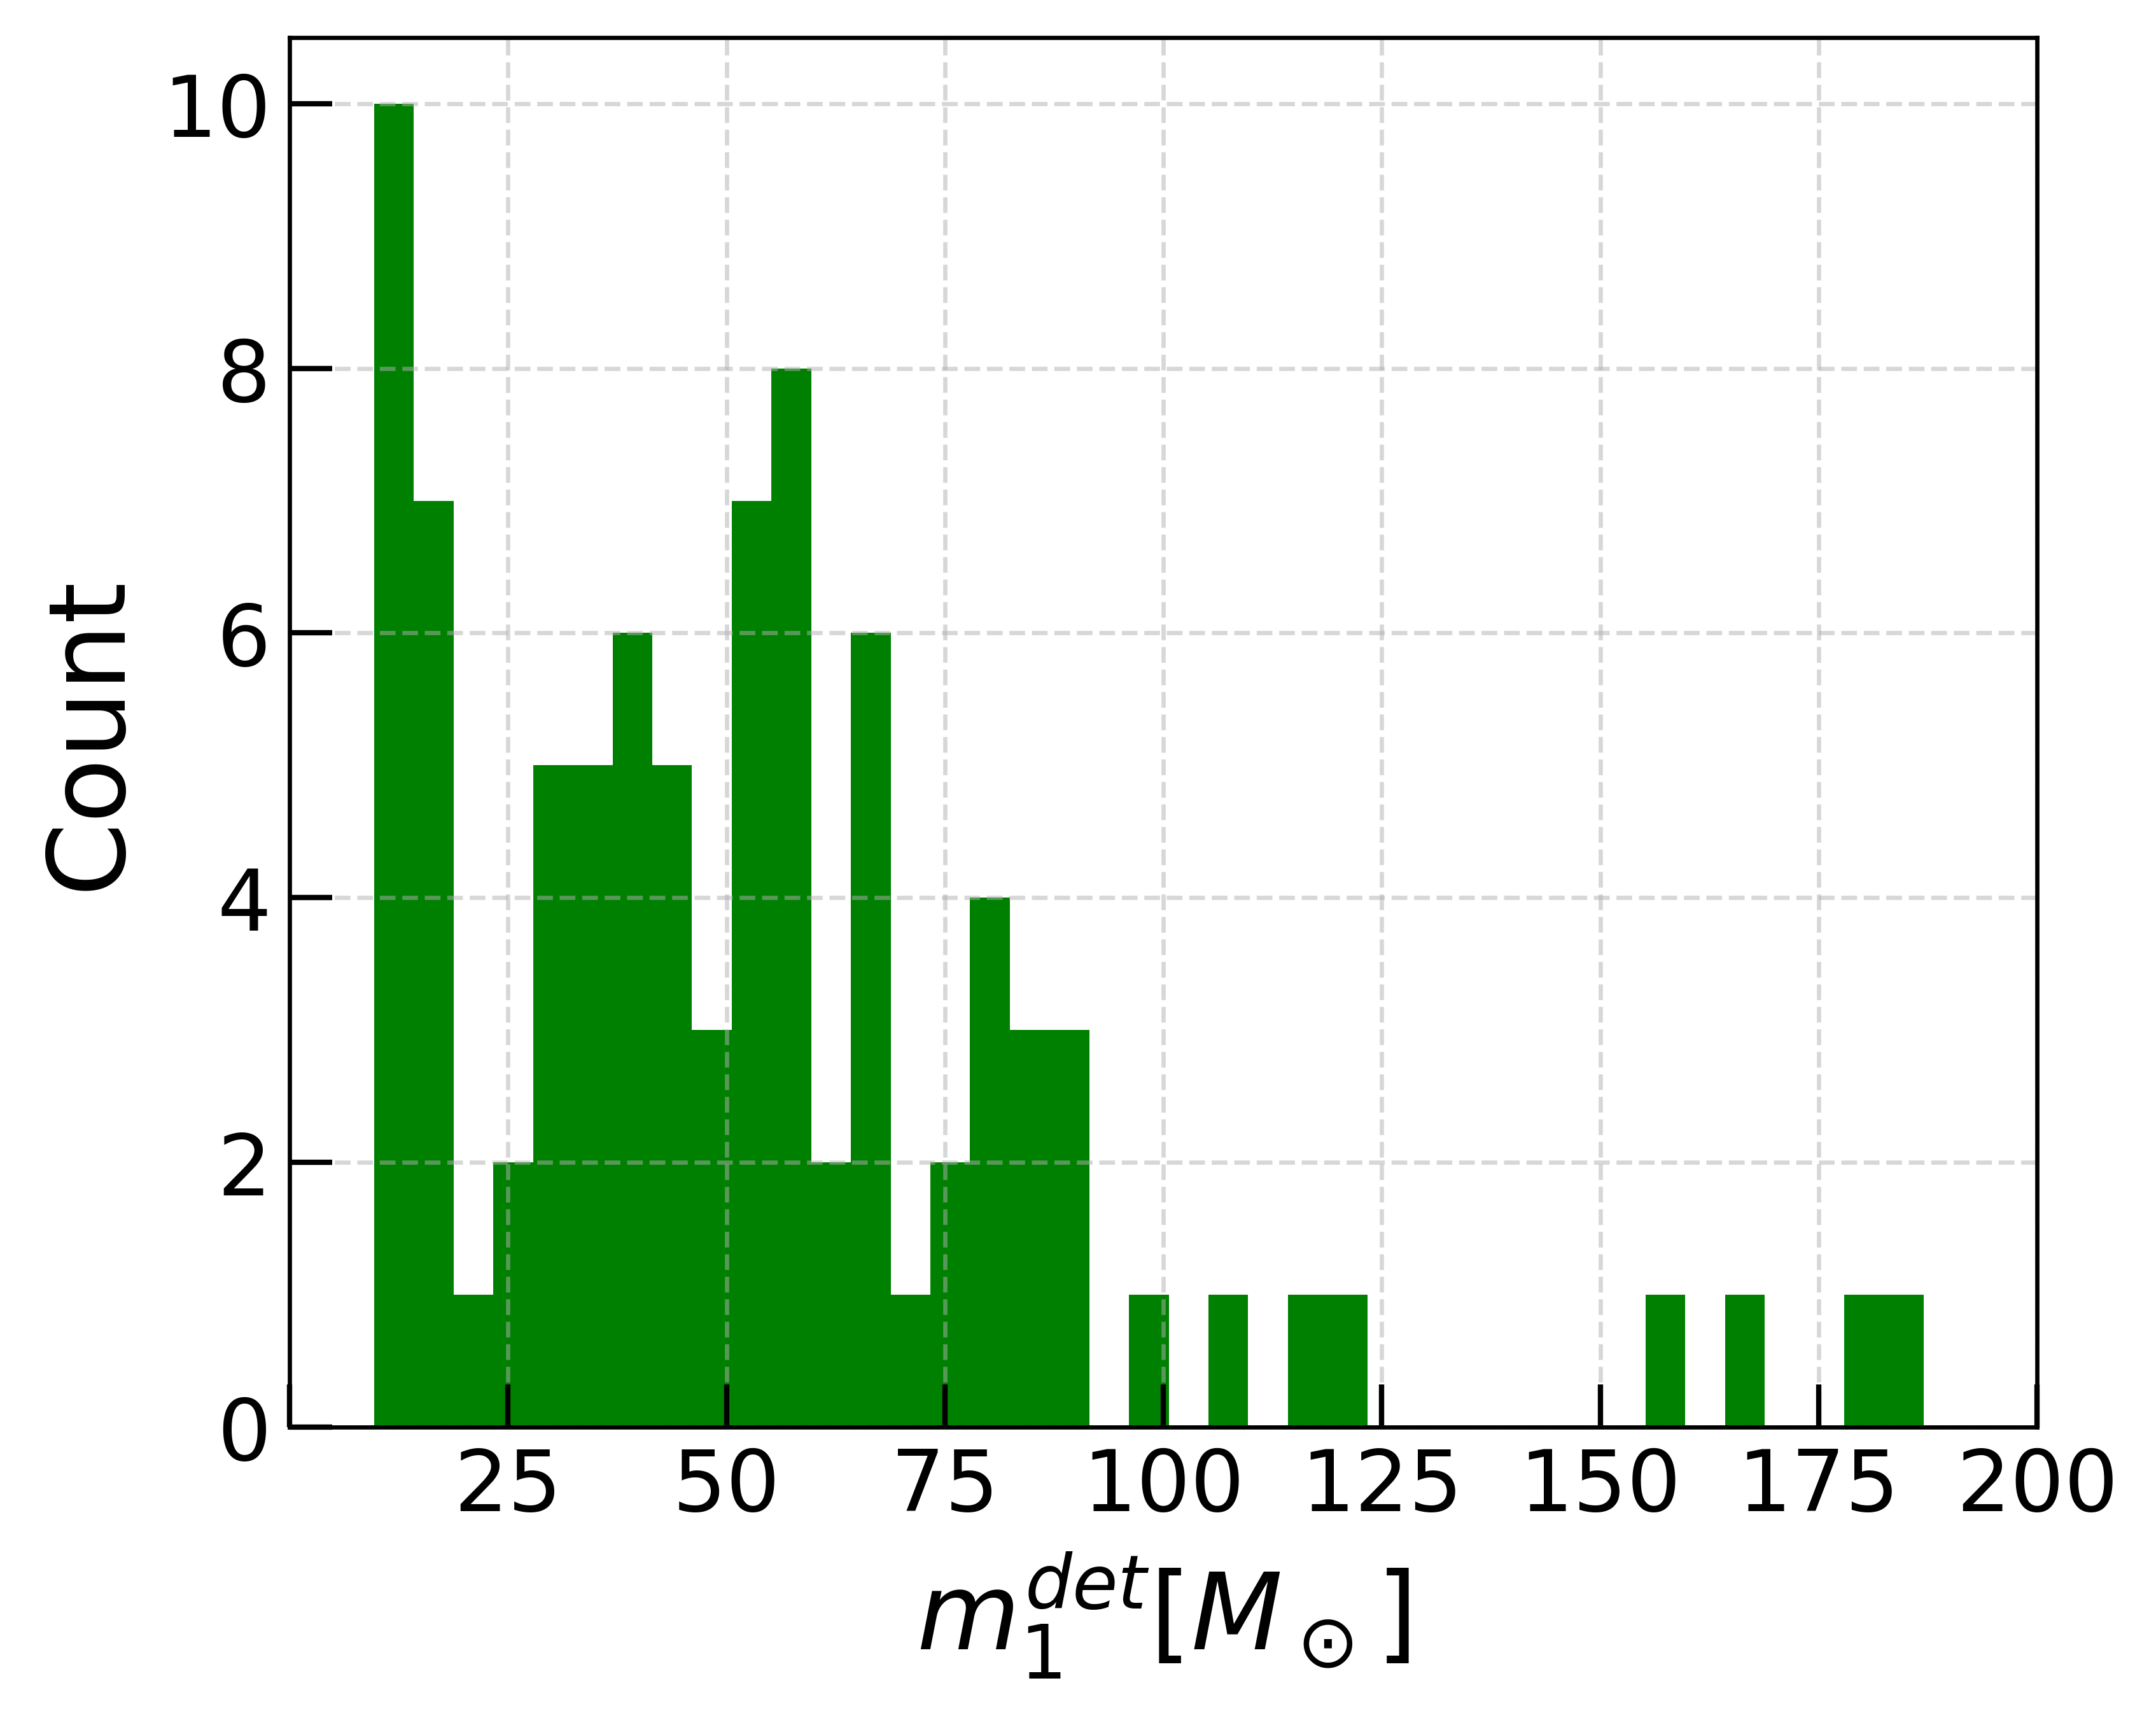

Delta m : 4.546666666666667
하위 90%의 질량 상한값: 88.8
PDF sum : 400.106667
데이터 갯수 : 88
모드 구간들 :
9.680000000000001-14.226666666666668, value : 10


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

GWTC_BBH = pd.read_csv('/Users/isumi/Desktop/[이수미 학위논문]/code file/file/GWTC_BBH.txt',
                       delim_whitespace=True, encoding='utf-8', na_values="NaN")
m1 = GWTC_BBH['m1_median'].round(1)
redshift = GWTC_BBH['redshift_median'].round(2)
m1_det=m1*(1+redshift).round(1)
m_min,m_max=min(m1_det),max(m1_det)
bins=np.linspace(m_min,m_max,40)
plt.figure(figsize=(15/2.54,12/2.54),dpi=600)
hist_values,bin_edges=np.histogram(m1_det,bins=bins,density=False)
plt.hist(m1_det,bins=bins,density=False,color='green')
plt.xlim(0,200)
plt.grid(True,linestyle='--',alpha=0.5)
ax=plt.gca()
xticks=ax.get_xticks()
yticks=ax.get_yticks()
common=set(np.round(xticks,6))&set(np.round(yticks,6))
xticklabels = ["" if np.round(t, 6) in common else str(int(t)) for t in xticks]
yticklabels = [f"{t:.0f}" for t in yticks]  # y축은 포맷 유지
ax.set_xticklabels(xticklabels, fontsize=16)
ax.set_yticklabels(yticklabels, fontsize=16)
plt.tick_params(which='major', length=8, width=1, direction='in')
plt.xlabel(r"$m_1^{det} [M_\odot]$",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

# 하위 90%
print("Delta m :",bins[1]-bins[0])
threshold_90=np.quantile(m1_det,0.9)
print(f"하위 90%의 질량 상한값: {threshold_90:.1f}")
# PDF 총합 계산
pdf_integral=np.sum(hist_values*np.diff(bin_edges))
print(f"PDF sum : {pdf_integral:.6f}")
print(f"데이터 갯수 : {len(m1)}")
# Mode 
max_values=np.max(hist_values)
max_indices=np.where(hist_values==max_values)[0]
mode_ranges=[(bin_edges[i],bin_edges[i+1]) for i in max_indices]
print("모드 구간들 :")
for mode_range in mode_ranges:
    print(f"{mode_range[0]}-{mode_range[1]}, value : {max_values}")

# Cumulative Distribution Function (CDF) of the Data
This figure shows the cumulative distribution function (CDF) of the observed binary black holes (BBHs).

/var/folders/ch/_k4qgk4x52d72hs7lwplg_lw0000gn/T/ipykernel_62942/1680819754.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  GWTC_BBH=pd.read_csv('/Users/isumi/Desktop/[이수미 학위논문]/code file/file/GWTC_BBH.txt',delim_whitespace=True,encoding='utf-8',na_values="NaN")


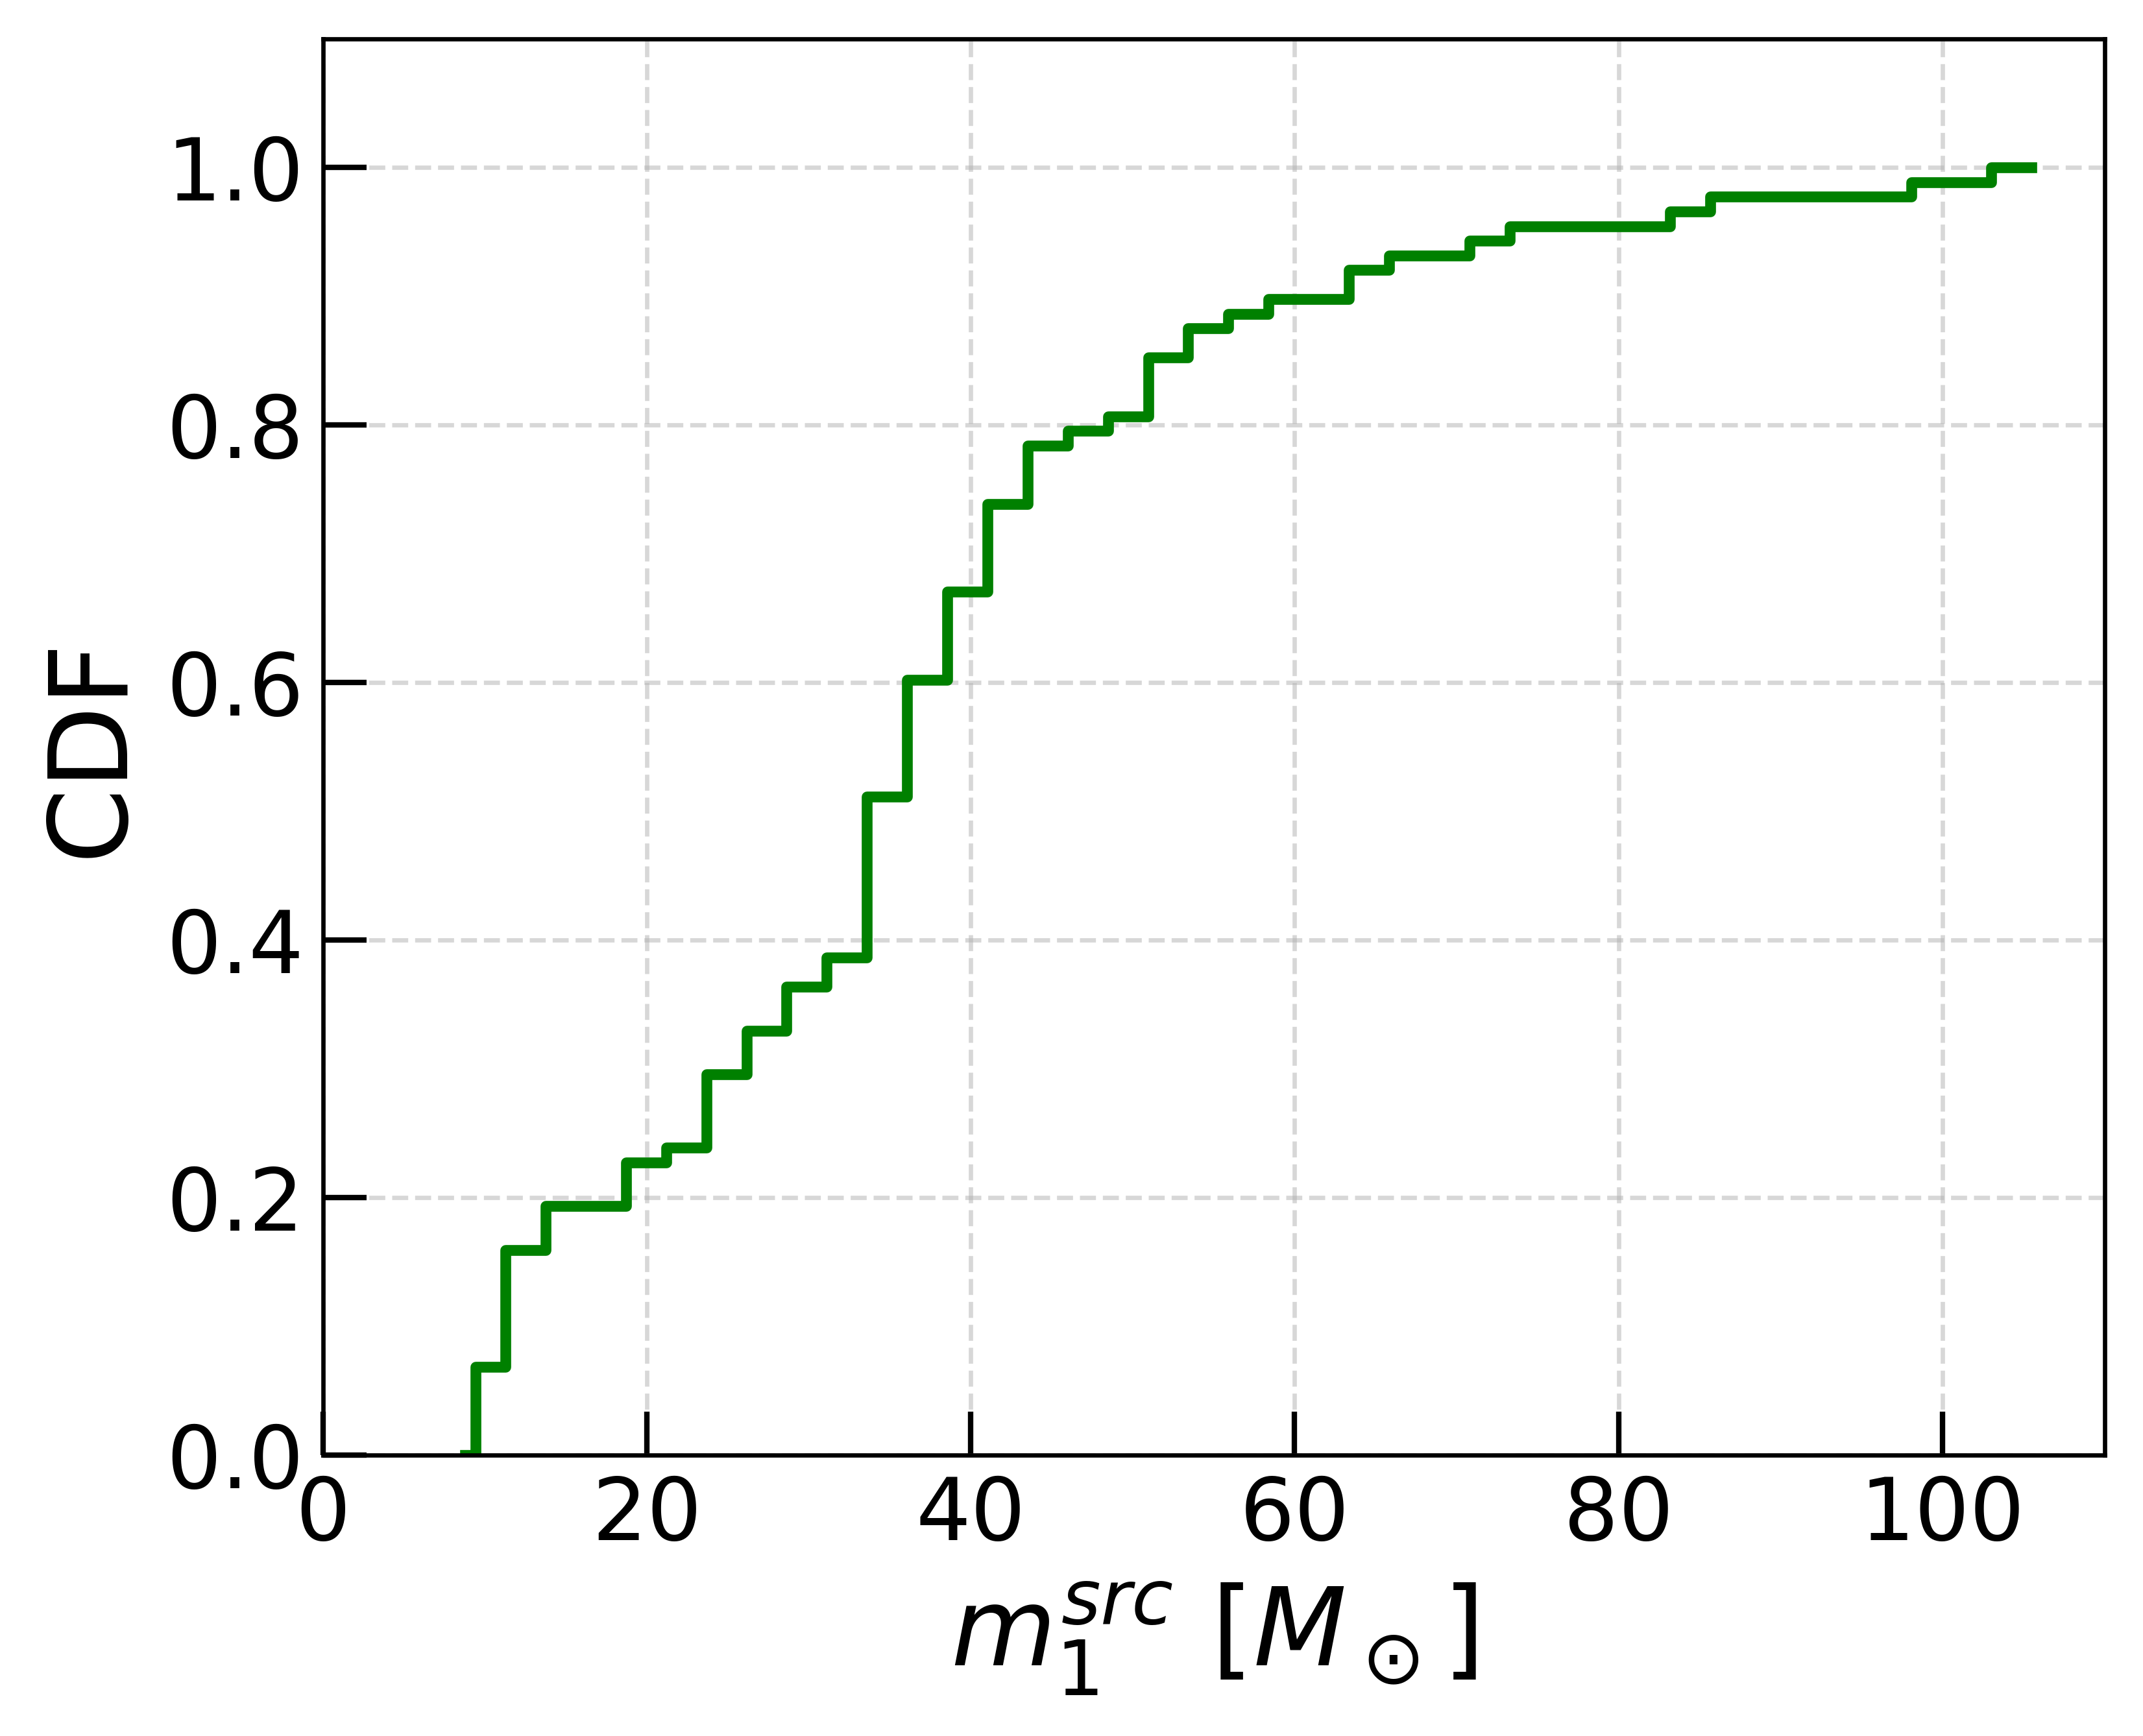

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

plt.rcParams['text.usetex'] = False # LaTeX 활성화

GWTC_BBH=pd.read_csv('/Users/isumi/Desktop/[이수미 학위논문]/code file/file/GWTC_BBH.txt',delim_whitespace=True,encoding='utf-8',na_values="NaN")
m1=GWTC_BBH['m1_median'].round(1)

m_min,m_max=8.8,105.5
bins=np.linspace(m_min,m_max,40)
hist_values,bin_edges=np.histogram(m1,bins=bins,density=True)
cum_hist_values=np.cumsum(hist_values*(bins[1]-bins[0]))

width_cm=15
height_cm=12
plt.figure(figsize=(width_cm/2.54,height_cm/2.54),dpi=600)
midpoints=(bin_edges[1:]+bin_edges[:-1])/2
x=np.concatenate([[bin_edges[0]],midpoints,[bin_edges[-1]]])
y=np.concatenate([[0],cum_hist_values,[max(cum_hist_values)]])
#plt.step(midpoints, cum_hist_values, where='mid',linewidth=2,color='green')
plt.step(x,y,where='mid',linewidth=2,color='green')
#plt.scatter(midpoints,cum_hist_values,s=5,color='red')
plt.xlabel(r"$m_1^{src}~[M_\odot]$",fontsize=20)
plt.ylabel("CDF",fontsize=20)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True,linestyle='--',alpha=0.5)
plt.xlim(0,110)
plt.ylim(0,1.1)
plt.tick_params(which='major', length=8, width=1, direction='in')

plt.show()